## Predicting number of days for which customer will rent a DVD for effective inventory planning

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Basic information about data

In [4]:
# Reading CSV file
rental_info = pd.read_csv('rental_info.csv')
rental_info.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


In [5]:
# Dimension of data frame
rental_info.shape

(15861, 15)

In [6]:
# Basic information about columns
rental_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_date       15861 non-null  object 
 1   return_date       15861 non-null  object 
 2   amount            15861 non-null  float64
 3   release_year      15861 non-null  float64
 4   rental_rate       15861 non-null  float64
 5   length            15861 non-null  float64
 6   replacement_cost  15861 non-null  float64
 7   special_features  15861 non-null  object 
 8   NC-17             15861 non-null  int64  
 9   PG                15861 non-null  int64  
 10  PG-13             15861 non-null  int64  
 11  R                 15861 non-null  int64  
 12  amount_2          15861 non-null  float64
 13  length_2          15861 non-null  float64
 14  rental_rate_2     15861 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


In [7]:
# Descriptive statistics of numerical columns
rental_info.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,15861.0,4.217161,2.360383,0.9900,2.9900,3.9900,4.9900,11.9900
release_year,15861.0,2006.885379,2.025027,2004.0000,2005.0000,2007.0000,2009.0000,2010.0000
rental_rate,15861.0,2.944101,1.649766,0.9900,0.9900,2.9900,4.9900,4.9900
length,15861.0,114.994578,40.114715,46.0000,81.0000,114.0000,148.0000,185.0000
replacement_cost,15861.0,20.224727,6.083784,9.9900,14.9900,20.9900,25.9900,29.9900
NC-17,15861.0,0.204842,0.403599,0.0000,0.0000,0.0000,0.0000,1.0000
PG,15861.0,0.200303,0.400239,0.0000,0.0000,0.0000,0.0000,1.0000
PG-13,15861.0,0.223378,0.416523,0.0000,0.0000,0.0000,0.0000,1.0000
R,15861.0,0.198726,0.399054,0.0000,0.0000,0.0000,0.0000,1.0000
amount_2,15861.0,23.355504,23.503164,0.9801,8.9401,15.9201,24.9001,143.7601


### Exploratory Data Analysis

In [9]:
# Check for missing values
rental_info.isna().sum()

rental_date         0
return_date         0
amount              0
release_year        0
rental_rate         0
length              0
replacement_cost    0
special_features    0
NC-17               0
PG                  0
PG-13               0
R                   0
amount_2            0
length_2            0
rental_rate_2       0
dtype: int64

In [10]:
# Changing the data types of required columns
rental_info['rental_date'] = pd.to_datetime(rental_info['rental_date'])
rental_info['return_date'] = pd.to_datetime(rental_info['return_date'])
rental_info['release_year'] = rental_info['release_year'].astype(int)

# Checking for data types
rental_info.dtypes

rental_date         datetime64[ns, UTC]
return_date         datetime64[ns, UTC]
amount                          float64
release_year                      int32
rental_rate                     float64
length                          float64
replacement_cost                float64
special_features                 object
NC-17                             int64
PG                                int64
PG-13                             int64
R                                 int64
amount_2                        float64
length_2                        float64
rental_rate_2                   float64
dtype: object

In [11]:
# Determing the number of days for which DVD has been rented and adding it to dataframe
rental_info["rental_length_days"] = (rental_info['return_date'] - rental_info['rental_date']).dt.days
rental_info.shape

(15861, 16)

#### Dummy Variables for 'special_features' column

In [13]:
# Contents of special_features column as list structure
contents = list(rental_info['special_features'].unique())
contents

['{Trailers,"Behind the Scenes"}',
 '{Trailers}',
 '{Commentaries,"Behind the Scenes"}',
 '{Trailers,Commentaries}',
 '{"Deleted Scenes","Behind the Scenes"}',
 '{Commentaries,"Deleted Scenes","Behind the Scenes"}',
 '{Trailers,Commentaries,"Deleted Scenes"}',
 '{"Behind the Scenes"}',
 '{Trailers,"Deleted Scenes","Behind the Scenes"}',
 '{Commentaries,"Deleted Scenes"}',
 '{Commentaries}',
 '{Trailers,Commentaries,"Behind the Scenes"}',
 '{Trailers,"Deleted Scenes"}',
 '{"Deleted Scenes"}',
 '{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}']

In [14]:
# Since there are many items in each content, we need to extract individual items using the 'for' loop
items =[]
for i in contents:
    m = i.replace("{",'').replace('}','').replace('"','').split(',')
    for j in range(len(m)):
        items.append(m[j])
items

['Trailers',
 'Behind the Scenes',
 'Trailers',
 'Commentaries',
 'Behind the Scenes',
 'Trailers',
 'Commentaries',
 'Deleted Scenes',
 'Behind the Scenes',
 'Commentaries',
 'Deleted Scenes',
 'Behind the Scenes',
 'Trailers',
 'Commentaries',
 'Deleted Scenes',
 'Behind the Scenes',
 'Trailers',
 'Deleted Scenes',
 'Behind the Scenes',
 'Commentaries',
 'Deleted Scenes',
 'Commentaries',
 'Trailers',
 'Commentaries',
 'Behind the Scenes',
 'Trailers',
 'Deleted Scenes',
 'Deleted Scenes',
 'Trailers',
 'Commentaries',
 'Deleted Scenes',
 'Behind the Scenes']

In [15]:
# Extracting unique items from the items list
items_s = pd.Series(items).unique()
items_s

array(['Trailers', 'Behind the Scenes', 'Commentaries', 'Deleted Scenes'],
      dtype=object)

In [16]:
# Dummy variable for each item in special_features column
for i in items_s:
    rental_info[i] = np.where(rental_info["special_features"].str.contains(i), 1,0)
rental_info.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length_days,Trailers,Behind the Scenes,Commentaries,Deleted Scenes
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3,1,1,0,0
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2,1,1,0,0
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7,1,1,0,0
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2,1,1,0,0
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4,1,1,0,0


### Machine Learning Prediction Modelling

In [18]:
# Splitting the data into feature and target variables 
cols_drop = ['rental_date', 'return_date', 'special_features', 'rental_length_days']
X = rental_info.drop(columns = cols_drop)
y = rental_info['rental_length_days']

# Further splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
X_train.shape

(12688, 16)

#### Linear Regression with lasso features

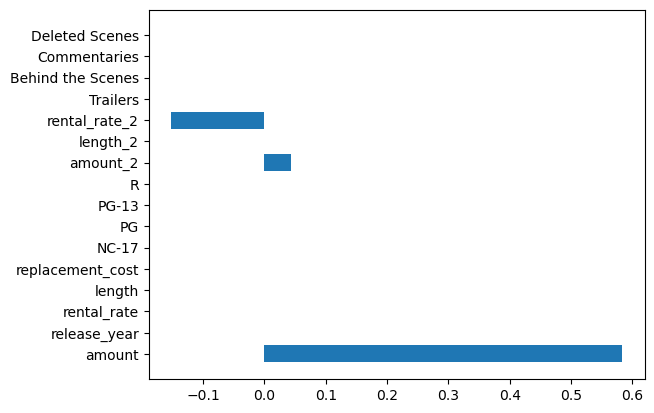

array([ 5.83523704e-01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  4.32781723e-02,  3.22239892e-06, -1.51745353e-01,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [20]:
# Determining lasso coefficients for feature selection

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
coef = lasso.coef_

# Plotting lasso coefficients
plt.barh(width = coef, y=X.columns)
plt.show()
coef

In [21]:
# Feature selection for Linear Regression using non-zero Lasso coefficients
features = (X_train.columns[coef != 0])
features

Index(['amount', 'amount_2', 'length_2', 'rental_rate_2'], dtype='object')

In [22]:
# Scaling and Linear Regression in the pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as MSE

# Initializing pipeline
scale = StandardScaler()
lr = LinearRegression()
pipeline = make_pipeline(scale, lr)

# Featured data from X_train and X_test
X_train_f, X_test_f = X_train[features], X_test[features]

# Fitting featured data into the model
pipeline.fit(X_train_f, y_train)

# Prediction for X_test_f
pred_lr = pipeline.predict(X_test_f)
pred_lr

array([6.20733224, 2.99169866, 6.34201089, ..., 2.61113682, 2.56126426,
       6.06798421])

In [23]:
# Determining mean squared error for linear regression model
mse_lr = MSE(y_test, pred_lr)
mse_lr

2.9474442949778803

#### Random Forest Regressor

In [25]:
# Creating a Random Forest Regressor Model and hyperparameter tuning it with Randomized Search cross-validation

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Hyperparameter space of random forest
hyp_param = {'n_estimators' : np.arange(1,101,1),
             'max_depth' : np.arange(1,11,1)}

# Best hyperparameters using randomized search cross-validation
rs_cv = RandomizedSearchCV(rf,
                           param_distributions= hyp_param,
                           cv = 5,
                           random_state= 14)
rs_cv.fit(X_train, y_train)
best_hyp_param = rs_cv.best_params_
best_hyp_param

{'n_estimators': 62, 'max_depth': 8}

In [26]:
# Applying Random Forest Regressor model using best hyper-parameters
rf = RandomForestRegressor(n_estimators=best_hyp_param['n_estimators'],
                           max_depth=best_hyp_param['max_depth'])
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
pred_rf

array([6.54628755, 2.46932465, 6.93437087, ..., 2.83813557, 2.49704779,
       6.71019998])

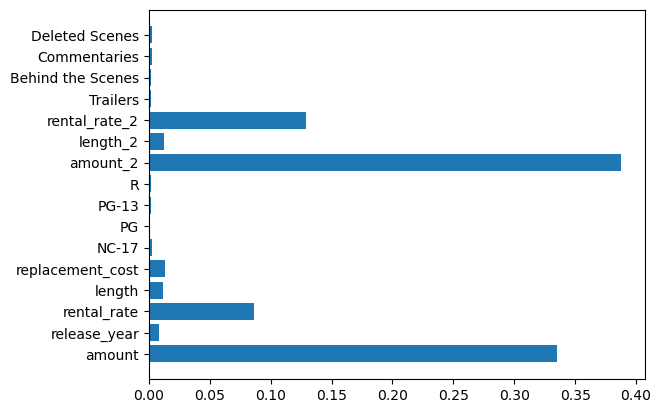

Index(['amount', 'rental_rate', 'amount_2', 'rental_rate_2'], dtype='object')

In [27]:
# Features weightage given by random forest regressor model
wt = rf.feature_importances_

# Vizualising feature importance
plt.barh(y = X.columns, width = wt)
plt.show()

# Selecting columns having greater than 5% weightage
X.columns[wt > 0.05]

In [28]:
# Determining mean squared error for random forest regression model
mse_rf = MSE(y_test, pred_rf)
mse_rf

2.3133075312351346

### Model Comparision

In [30]:
# Deciding the best model among all models
models = [lr, rf]
mse = [mse_lr, mse_rf]
model_stats = pd.Series(mse, index=models)
best_model = model_stats.idxmin()
best_mse = round(model_stats.min(),3)
print(f'Best model among {len(models)} models is {best_model} with mean squared error {best_mse}.')

Best model among 2 models is RandomForestRegressor(max_depth=8, n_estimators=62) with mean squared error 2.313.
